# PLOT PROBABILITY DENSITIES

This notebook can be used to generate the probability densities surface plots from the files provided by QSLE-v1.0 program. In addition, the user can modify the units of measure, for example changing the radians into degrees.

Please read this notebook carefully and follow the procedure step by step.

## Import Libraries

To use this notebook, the following libraries need to be imported:
* `Numpy`
* `Scipy`
* `Pandas`
* `Matplotlib`
* `Tkinter`

After having installed the mentioned libraries, you can run the following cells.

In [1]:
import numpy as np
import scipy.constants as sc
import pandas as pd
import tkinter as tk
from tkinter import filedialog
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import matplotlib.colors as mcol
import matplotlib.cm as cm
from matplotlib.ticker import AutoMinorLocator
from scipy.interpolate import PchipInterpolator

def error_exit():
    print("\n### Terminating program because of errors ###\n")
    exit(1)

print("\n********************************")
print("* LIBRARIES LOADED SUCCESSFULLY*")
print("********************************")


********************************
* LIBRARIES LOADED SUCCESSFULLY*
********************************


## Choosing Restart and PES File

The first thing you must do is to select the restart file printed from the QSLE run (i.e. `PREFIX_restart.inp`) and the file containing the potential energy surfaces.

Run the following cell and choose the *.inp filename and the PESs file.

In [7]:
root=tk.Tk()
root.withdraw()
restart= filedialog.askopenfilename(title="CHOOSE THE RESTART FILE", filetypes=(("restart files","*.inp"),("all files", "*.*")))

input_file=pd.read_csv(restart, sep='\s+', header=None, usecols=[0,1])

angle_points= int(input_file[input_file[0].str.contains("Angle_points")].iat[0,1])
mom_points= int(input_file[input_file[0].str.contains("Momentum_points")].iat[0,1])
mom_max= float(input_file[input_file[0].str.contains("Mom_max")].iat[0,1])
prefix= input_file[input_file[0].str.contains("Prefix")].iat[0,1]
pes_name = input_file[input_file[0].str.contains("Pes")].iat[0,1]
#mu01_name = input_file[input_file[0].str.contains("mu01")].iat[0,1]

mom_grid=np.linspace(-mom_max,mom_max,mom_points)
angle_grid=np.zeros(angle_points)
sqmu01=np.ones(angle_points)
for i in range(angle_points):
    angle_grid[i]=-np.pi+i*2.*np.pi/angle_points

print("\n*************************************")
print("* RESTART FILE IMPORTED SUCCESSFULLY*")
print("*************************************")

pes_file= filedialog.askopenfilename(title="CHOOSE THE PES FILE", filetypes=(("pes file", pes_name),("all files", "*.*")))
pes = np.genfromtxt(pes_file, dtype=np.float32)
fun_deltaE=PchipInterpolator(pes[:,0], pes[:,2]- pes[:,1])

print("\n*********************************")
print("* PES FILE IMPORTED SUCCESSFULLY*")
print("*********************************")


*************************************
* RESTART FILE IMPORTED SUCCESSFULLY*
*************************************

*********************************
* PES FILE IMPORTED SUCCESSFULLY*
*********************************


FileNotFoundError:  not found.

## Choosing Dipole Moment File (optional)

Here, you can add the file containing the dipole moment ($\mu_{01}$) in order to better reproduce the spectra. If not provided, the dipole moment will be considered equal to 1 for every angle value.

Run the following cell only if you want to choose the dipole moment file.

In [ ]:
mu01_file= filedialog.askopenfilename(title="CHOOSE THE DIPOLE MOMENT FILE")
mu01 = np.genfromtxt(mu01_file, dtype=np.float32)
fun_mu01=PchipInterpolator(mu01[:,0], mu01[:,1])
for i in range(angle_points):
    sqmu01[i] = fun_mu01(angle_grid[i])**2

print("\n************************************")
print("* DIPOLE FILE IMPORTED SUCCESSFULLY*")
print("************************************")

## Choosing The Units Of Measure

Now, you can set the units of measure you want to adopt. 

Run the cell below and follow the instructions on the appearing windows.

In [12]:
list_titles=["TIME", "WAVE ENERGY"]
sel_units = ["fs", "eV"]
list_selections=["FEMTOSECOND", "ELECTRONVOLT"]
list_choices=[["FEMTOSECOND", "NANOSECOND", "PICOSECOND","ATTOSECOND"],
              ["ELECTRONVOLT", "NANOMETER", "1/CENTIMETER", "HERTZ"]]
list_units = [["fs", "ns" , "ps", "as"],
              ["eV", "nm", r"cm$^{-1}$", "Hz"]]

list_coeff=[[1.0, 10**(-6), 10**(-3), 10**(3)],
            [1.0,  sc.c/(sc.electron_volt/sc.Planck)*10**9  , sc.electron_volt/sc.Planck / (sc.c*100), sc.electron_volt /sc.Planck]]



print("\n********************************")
print("* STARTING THE CHOICE OF UNITS *")
print("********************************")


for i in range(len(list_selections)):
    appear = True
    def showSelected():
        global appear
        global list_selections
        global i
        show.config(text=str(bigListbox.get("anchor"))+ " is your current choice.\nIf you are sure, press NEXT.")
        list_selections[i]=str(bigListbox.get("anchor"))
        if appear == True:
            show.pack()
            b1.pack(pady=10)
            appear = False
    def procede():
        rootWindow.quit()
        rootWindow.destroy()

    bigArr=list_choices[i]

    rootWindow = tk.Tk()
    rootWindow.title(list_titles[i] + " UNIT")
    height = 150+25*len(bigArr)
    rootWindow.geometry("300x" +str(height))

    bigListbox = tk.Listbox(rootWindow, height=len(bigArr), selectmode= "single", font=10)
    bigListbox.pack(pady=10)

    myIndex = len(bigArr)
    for index in range(0, myIndex):
        bigListbox.insert(myIndex, bigArr[index])

    tk.Button(rootWindow, text='SELECT HIGHLIGHTED KEYWORD', command=showSelected).pack(pady=10)

    show = tk.Label(rootWindow)
    show.config(text= list_selections[i] +" is your current choice.\nIf you are sure, press NEXT.")

    b1 = tk.Button(rootWindow, text='NEXT', command=procede)

    rootWindow.mainloop()

    print("+ {0} --> {1}".format(list_titles[i],list_selections[i]))


time_converter = 1.0
time_choices = list_choices[0]
time_coeff = list_coeff[0]
units = list_units[0]
for i in range(len(time_choices)):
    if list_selections[0] == time_choices[i]:
        time_converter = time_coeff[i]
        sel_units[0] = units[i]
        break

energy_converter = 1.0
energy_choices = list_choices[1]
energy_coeff = list_coeff[1]
units = list_units[1]
for i in range(len(energy_choices)):
    if list_selections[1] == energy_choices[i]:
        energy_converter = energy_coeff[i]
        sel_units[1] = units[i]
        break

print("\n*******************************")
print("* UNITS CONVERTED SUCCESSFULLY*")
print("*******************************")


********************************
* STARTING THE CHOICE OF UNITS *
********************************
+ TIME --> PICOSECOND
+ WAVE ENERGY --> NANOMETER

*******************************
* UNITS CONVERTED SUCCESSFULLY*
*******************************


## Choosing The 'Time' Files

Finally, you can select the output files related to the evolution of the probability density (i.e. `PREFIX_time_N.dat`). 

Run the cell below, choose the *.dat files of your choice (for multiple selection remember to hold down CTRL), fix the standard deviation of the gaussians and choose the borders of the resulting spectra by following the gui instructions.


**********************
* PLOTTING THE FILES *
**********************
+ QSLE_esano_time_29000.dat --> Spectra_QSLE_esano_time_29000.dat & Spectra_QSLE_esano_time_29000.png

*****************************
* FILES PLOTTED SUCCESSFULLY*
*****************************


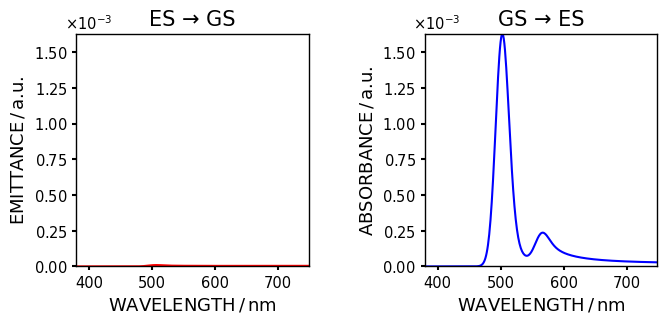

In [13]:
files= filedialog.askopenfilenames(title="CHOOSE THE 'TIME' FILES", filetypes=(("data files","*.dat"),("all files", "*.*")))
directory = files[0][:files[0].rfind('/')]
initial_path= directory + "/Spectra_"

deltaE = np.zeros(len(angle_grid))
if list_selections[1] != "NANOMETER":
    for i in range(len(angle_grid)):
        deltaE[i] = fun_deltaE(angle_grid[i]) * energy_converter
else:
    for i in range(len(angle_grid)):
        deltaE[i] = energy_converter / fun_deltaE(angle_grid[i])

appear = True

def check_user_input(text):
    global width
    global appear
    try:
        num=float(text)
        width = text
    except ValueError:
        width = "0.1"
    if appear == True:
        lbl.pack(pady=10)
        b1.pack(pady=10)
        appear = False

width = "0.1"

frame = tk.Tk() 
frame.title("CHOOSE STANDARD DEVIATION") 
frame.geometry('400x220') 
  
def printInput():
    global width
    inp = inputtxt.get(1.0, "end-1c")
    check_user_input(inp)
    lbl.config(text = width +  " is your current choice.\nIf you are sure, press NEXT.")
    
def procede():
    frame.quit()
    frame.destroy()
  
# TextBox Creation 
inputtxt = tk.Text(frame,height = 2,  width = 20) 
inputtxt.insert(1.0, "0.1")
inputtxt.pack(pady=10) 
  
# Button Creation 
printButton = tk.Button(frame, text = "CHOOSE WRITTEN VALUE",  command = printInput) 
printButton.pack(pady=10)
  
# Label Creation 
lbl = tk.Label(frame, text = width +  " is your current choice.\nIf you are sure, press NEXT.") 

b1 = tk.Button(frame, text='NEXT', command=procede)
frame.mainloop()

appear = True
def check_user_input_2(text):
    global min_value
    global appear
    try:
        num=float(text)
        min_value = text
    except ValueError:
        min_value = "DEFAULT"
    if appear == True:
        lbl.pack(pady=10)
        b1.pack(pady=10)
        appear = False

min_value = "DEFAULT"

frame = tk.Tk() 
frame.title("CHOOSE MINIMUM " + list_selections[1]) 
frame.geometry('400x220') 
  
def printInput():
    global min_value
    inp = inputtxt.get(1.0, "end-1c")
    check_user_input_2(inp)
    lbl.config(text =  min_value + " is your current choice.\nIf you are sure, press NEXT.")
    
def procede():
    frame.quit()
    frame.destroy()
  
# TextBox Creation 
inputtxt = tk.Text(frame,height = 2,  width = 20) 
inputtxt.insert(1.0, "DEFAULT")
inputtxt.pack(pady=10) 
  
# Button Creation 
printButton = tk.Button(frame, text = "CHOOSE WRITTEN VALUE",  command = printInput) 
printButton.pack(pady=10)
  
# Label Creation 
lbl = tk.Label(frame, text = min_value + " is your current choice.\nIf you are sure, press NEXT.") 


b1 = tk.Button(frame, text='NEXT', command=procede)
frame.mainloop()

appear = True
def check_user_input_3(text):
    global max_value
    global appear
    try:
        num=float(text)
        max_value = text
    except ValueError:
        max_value = "DEFAULT"
    if appear == True:
        lbl.pack(pady=10)
        b1.pack(pady=10)
        appear = False

max_value = "DEFAULT"

frame = tk.Tk() 
frame.title("CHOOSE MAXIMUM " + list_selections[1]) 
frame.geometry('400x220') 
  
def printInput():
    global max_value
    inp = inputtxt.get(1.0, "end-1c")
    check_user_input_3(inp)
    lbl.config(text =  max_value + " is your current choice.\nIf you are sure, press NEXT.")
    
def procede():
    frame.quit()
    frame.destroy()
  
# TextBox Creation 
inputtxt = tk.Text(frame,height = 2,  width = 20) 
inputtxt.insert(1.0, "DEFAULT")
inputtxt.pack(pady=10) 
  
# Button Creation 
printButton = tk.Button(frame, text = "CHOOSE WRITTEN VALUE",  command = printInput) 
printButton.pack(pady=10)
  
# Label Creation 
lbl = tk.Label(frame, text = max_value + " is your current choice.\nIf you are sure, press NEXT.") 

b1 = tk.Button(frame, text='NEXT', command=procede)
frame.mainloop() 

appear = True
def check_user_input_4(text):
    global max_intensity
    global appear
    try:
        num=float(text)
        max_intensity = text
    except ValueError:
        max_intensity = "DEFAULT"
    if appear == True:
        lbl.pack(pady=10)
        b1.pack(pady=10)
        appear = False

max_intensity = "DEFAULT"

frame = tk.Tk() 
frame.title("CHOOSE MAX INTENSITY") 
frame.geometry('400x220') 
  
def printInput():
    global max_intensity
    inp = inputtxt.get(1.0, "end-1c")
    check_user_input_4(inp)
    lbl.config(text =  max_intensity + " is your current choice.\nIf you are sure, press NEXT.")
    
def procede():
    frame.quit()
    frame.destroy()
  
# TextBox Creation 
inputtxt = tk.Text(frame,height = 2,  width = 20) 
inputtxt.insert(1.0, "DEFAULT")
inputtxt.pack(pady=10) 
  
# Button Creation 
printButton = tk.Button(frame, text = "CHOOSE WRITTEN VALUE",  command = printInput) 
printButton.pack(pady=10)
  
# Label Creation 
lbl = tk.Label(frame, text = max_intensity + " is your current choice.\nIf you are sure, press NEXT.") 

b1 = tk.Button(frame, text='NEXT', command=procede)
frame.mainloop() 



print("\n**********************")
print("* PLOTTING THE FILES *")
print("**********************")

for file in files:
    data=np.genfromtxt(file, dtype=np.float32)
    norm= np.sum(data)
    name= file[file.rfind(prefix):len(file)-4]
    time= float(file[file.rfind("time")+5:len(file)-4])
    time *= time_converter

    HOMO = data[:len(data)//2].reshape(len(angle_grid), len(mom_grid))
    HOMO_angle = np.sum(HOMO.T, axis=0)
    LUMO = data[len(data)//2:].reshape(len(angle_grid), len(mom_grid))
    LUMO_angle =np.sum(LUMO.T, axis=0)

    stadev = float(width)
    
    if min_value == "DEFAULT":
        deltaE_min = np.min(deltaE)- 5*stadev
        if deltaE_min < 0:
            deltaE_min = 0
    else:
        deltaE_min = float(min_value)
    if max_value == "DEFAULT":
        deltaE_max = np.max(deltaE)+ 6*stadev
    else:
        deltaE_max = float(max_value)
    wavelength = np.arange(deltaE_min, deltaE_max, stadev/10.0)
    omegafactor = (wavelength / energy_converter )**3
    ABSORBANCE = np.zeros(len(wavelength))
    EMITTANCE = np.zeros(len(wavelength))

    for i in range(len(angle_grid)):
        ABSORBANCE += (sqmu01[i]*HOMO_angle[i]/np.sqrt(2*np.pi*stadev**2 ) *np.exp( -(wavelength - deltaE[i])**2/(2*stadev**2) ) )
        EMITTANCE += (sqmu01[i]*LUMO_angle[i]/np.sqrt(2*np.pi*stadev**2 ) *np.exp( -(wavelength - deltaE[i])**2/(2*stadev**2) ) )

    ABSORBANCE *= omegafactor
    EMITTANCE *= omegafactor
    ABSORBANCE /= norm
    EMITTANCE /= norm

    fout=open(initial_path + name + ".dat", "w")
    for i in range(len(wavelength)):
        fout.write("{0} {1} {2} \n".format(wavelength[i], ABSORBANCE[i], EMITTANCE[i]))

    fout.close()


    intensity_max = np.max(np.append(ABSORBANCE, EMITTANCE))

    params={'figure.figsize':(7.5,5),'axes.labelsize':13,'axes.titlesize':15,'xtick.labelsize':10.5,'ytick.labelsize':10.5,'axes.linewidth':'1.',
            'xtick.major.size':'3','xtick.major.width':'1.5','ytick.major.size':'3','ytick.major.width':'1.5',
            'xtick.minor.size':'2','xtick.minor.width':'1','ytick.minor.size':'2','ytick.minor.width':'1',
            'lines.linewidth':'1.5'}
    plt.rcParams.update(params)
    fig,axs=plt.subplots(1,2)
    
    stadev = float(width)

    axs[1].plot(wavelength, ABSORBANCE, color = "blue" )
    if list_selections[1] == "ELECTRONVOLT":
        axs[1].set_xlabel(r"ENERGY$\,/\,$" + sel_units[1] )
    elif list_selections[1] == "NANOMETER":
        axs[1].set_xlabel(r"WAVELENGTH$\,/\,$" + sel_units[1] )
    elif list_selections[1] == "1/CENTIMETER":
        axs[1].set_xlabel(r"WAVENUMBER$\,/\,$" + sel_units[1] )
    else:
        axs[1].set_xlabel(r"FREQUENCY$\,/\,$" + sel_units[1])
    if max_intensity == "DEFAULT":
        axs[1].set_ylim(0, intensity_max)
    else:
        axs[1].set_ylim(0, float(max_intensity))
    axs[1].set_xlim(np.min(wavelength), np.max(wavelength))
    axs[1].ticklabel_format(axis="y", scilimits=[0,0], useMathText = True)
    t1= axs[1].yaxis.get_offset_text()
    t1.set_x(-0.05)
    axs[1].set_ylabel(r"ABSORBANCE$\,/\,$a.u." )
    axs[1].set_title("GS → ES")
    #axs[0].yaxis.set_minor_locator(AutoMinorLocator())
    #axs[0].xaxis.set_minor_locator(AutoMinorLocator())
    axs[1].set_aspect(1.0/axs[1].get_data_ratio(), adjustable='box')


    axs[0].plot(wavelength, EMITTANCE, color = "red" )
    if max_intensity == "DEFAULT":
        axs[0].set_ylim(0, intensity_max)
    else:
        axs[0].set_ylim(0, float(max_intensity))
    axs[0].set_xlim(np.min(wavelength), np.max(wavelength))
    if list_selections[1] == "ELECTRONVOLT":
        axs[0].set_xlabel(r"ENERGY$\,/\,$" + sel_units[1] )
    elif list_selections[1] == "NANOMETER":
        axs[0].set_xlabel(r"WAVELENGTH$\,/\,$" + sel_units[1] )
    elif list_selections[1] == "1/CENTIMETER":
        axs[0].set_xlabel(r"WAVENUMBER$\,/\,$" + sel_units[1] )
    else:
        axs[0].set_xlabel(r"FREQUENCY$\,/\,$" + sel_units[1])
    axs[0].ticklabel_format(axis="y", scilimits=[0,0], useMathText = True)
    t2= axs[0].yaxis.get_offset_text()
    t2.set_x(-0.05)
    axs[0].set_ylabel(r"EMITTANCE$\,/\,$a.u." )
    axs[0].set_title("ES → GS")
    #axs[1].yaxis.set_minor_locator(AutoMinorLocator())
    #axs[1].xaxis.set_minor_locator(AutoMinorLocator())
    axs[0].set_aspect(1.0/axs[0].get_data_ratio(), adjustable='box')

    #fig.suptitle(r"  TIME : " +str(time)+ " " + sel_units[0] , fontsize=18,  weight='bold')

    plt.subplots_adjust(wspace=0.5,hspace=None)

    plt.savefig(initial_path + name+ ".png",bbox_inches='tight', pad_inches=0.03, dpi=600)
    print("+ {0}.dat --> Spectra_{0}.dat & Spectra_{0}.png".format(name))


print("\n*****************************")
print("* FILES PLOTTED SUCCESSFULLY*")
print("*****************************")


## Structure of the generated spectra.dat files

Together with the plot of the spectra, new files called `Spectra_PREFIX_time_N.dat` are generated, which can be easily displayed using `gnuplot platform`:

`plot "Spectra_PREFIX_time_N.dat" u 1:2 w l` -> to generate the plot of the absorption spectum

`plot "Spectra_PREFIX_time_N.dat" u 1:3 w l` -> to generate the plot of the emission spectrum

The structure of the new file is here described:

* 1st column) X axis of the spectrum in the unit decided by the user

* 2nd column) Absorption spectum in arbitrary units

* 3rd column) Emission spectrum in arbitrary units